## ***Project Environment Setup***

In [0]:
import os

In [0]:
DATA_DIR = 'data'
TEMP_DIR = 'temp'

In [0]:
os.makedirs(TEMP_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

In [0]:
def setup_kaggle():
    x = !ls kaggle.json
    assert x == ['kaggle.json'], 'Upload kaggle.json'
    !mkdir /root/.kaggle
    !mv kaggle.json /root/.kaggle
    !chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Make sure you've uploaded 'kaggle.json' file into Colab
setup_kaggle()

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
DOWNLOAD_DATA = True

if DOWNLOAD_DATA:
    !kaggle datasets download -d uciml/forest-cover-type-dataset -p {str(DATA_DIR)} --unzip

 45% 5.00M/11.0M [00:00<00:00, 27.5MB/s]
100% 11.0M/11.0M [00:00<00:00, 43.6MB/s]


## ***Dataset description***

In [0]:
# Data Exploration and visualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the data from the file
raw_data = pd.read_csv(DATA_DIR + '/' + 'covtype.csv', low_memory=False)

In [0]:
raw_data.head(3).T

,0,1,2
Elevation,2596,2590,2804
Aspect,51,56,139
Slope,3,2,9
Horizontal_Distance_To_Hydrology,258,212,268
Vertical_Distance_To_Hydrology,0,-6,65
Horizontal_Distance_To_Roadways,510,390,3180
Hillshade_9am,221,220,234
Hillshade_Noon,232,235,238
Hillshade_3pm,148,151,135
Horizontal_Distance_To_Fire_Points,6279,6225,6121



### Context
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest.

### Data Content
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

**Input variables**:
* *Elevation* - Elevation in meters.
* *Aspect* - Aspect in degrees azimuth.
* *Slope* - Slope in degrees.
* *Horizontal_Distance_To_Hydrology* - Horizontal distance to nearest surface water features.
* *Vertical_Distance_To_Hydrology* - Vertical distance to nearest surface water features.
* *Horizontal_Distance_To_Roadways* - Horizontal distance to nearest roadway.
* *Hillshade_9am* - Hill shade index at 9am, summer solstice. Value out of 255.
* *Hillshade_Noon* - Hill shade index at noon, summer solstice. Value out of 255.
* *Hillshade_3pm* - Hill shade index at 3pm, summer solstice. Value out of 255.
* *Horizontal_Distance_To_Fire_Points* - Horizontal distance to nearest wildfire ignition points.
* *Wilderness Area* (4 dummy variable binary columns, 0 = absence or 1 = presence): Wilderness area designation. Key is:
    1. Rawah Wilderness Area
    2. Neota Wilderness Area
    3. Comanche Peak Wilderness Area
    4. Cache la Poudre Wilderness Area
* *Soil Type* (40 dummy variable binary columns, 0 = absence or 1 = presence): Soil Type designation. Options are:
    1. Cathedral family - Rock outcrop complex, extremely stony
    2. Vanet - Ratake families complex, very stony
    3. Haploborolis - Rock outcrop complex, rubbly
    4. Ratake family - Rock outcrop complex, rubbly
    5. Vanet family - Rock outcrop complex complex, rubbly
    6. Vanet - Wetmore families - Rock outcrop complex, stony
    7. Gothic family
    8. Supervisor - Limber families complex
    9. Troutville family, very stony
    10. Bullwark - Catamount families - Rock outcrop complex, rubbly
    11. Bullwark - Catamount families - Rock land complex, rubbly
    12. Legault family - Rock land complex, stony
    13. Catamount family - Rock land - Bullwark family complex, rubbly
    14. Pachic Argiborolis - Aquolis complex
    15. unspecified in the USFS Soil and ELU Survey
    16. Cryaquolis - Cryoborolis complex
    17. Gateview family - Cryaquolis complex
    18. Rogert family, very stony
    19. Typic Cryaquolis - Borohemists complex
    20. Typic Cryaquepts - Typic Cryaquolls complex
    21. Typic Cryaquolls - Leighcan family, till substratum complex
    22. Leighcan family, till substratum, extremely bouldery
    23. Leighcan family, till substratum - Typic Cryaquolls complex
    24. Leighcan family, extremely stony
    25. Leighcan family, warm, extremely stony
    26. Granile - Catamount families complex, very stony
    27. Leighcan family, warm - Rock outcrop complex, extremely stony
    28. Leighcan family - Rock outcrop complex, extremely stony
    29. Como - Legault families complex, extremely stony
    30. Como family - Rock land - Legault family complex, extremely stony
    31. Leighcan - Catamount families complex, extremely stony
    32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony
    33. Leighcan - Catamount families - Rock outcrop complex, extremely stony
    34. Cryorthents - Rock land complex, extremely stony
    35. Cryumbrepts - Rock outcrop - Cryaquepts complex
    36. Bross family - Rock land - Cryumbrepts complex, extremely stony
    37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony
    38. Leighcan - Moran families - Cryaquolls complex, extremely stony
    39. Moran family - Cryorthents - Leighcan family complex, extremely stony
    40. Moran family - Cryorthents - Rock land complex, extremely stony
 
**Output variable**:
* *Cover_Type* - Forest Cover Type designation. Integer value between 1 and 7, with the following key:
    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz

### Object
To build a model that predicts what types of trees grow in an area based on the surrounding characteristics.

## ***Data Exploration***

In [0]:
print('Number of rows in the dataset:', raw_data.shape[0])
print('Number of columns in the dataset:', raw_data.shape[1])

Number of rows in the dataset: 581012
Number of columns in the dataset: 55


In [0]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [0]:
# Null Values
null_vals = raw_data.isnull().sum().reset_index(name='Number of NaN values')
null_vals

,index,Number of NaN values
0,Elevation,0
1,Aspect,0
2,Slope,0
3,Horizontal_Distance_To_Hydrology,0
4,Vertical_Distance_To_Hydrology,0
5,Horizontal_Distance_To_Roadways,0
6,Hillshade_9am,0
7,Hillshade_Noon,0
8,Hillshade_3pm,0
9,Horizontal_Distance_To_Fire_Points,0



Fortunately the number of Null values by feature indicates there is no missing data in our dataset.

In [0]:
print('Column Names')
print(raw_data.columns)

Column Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39',

In [0]:
target_col = ['Cover_Type']
num_cols = list(raw_data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points'].columns)
enc1_cols = list(raw_data.loc[:,'Wilderness_Area1':'Wilderness_Area4'].columns)
enc2_cols = list(raw_data.loc[:,'Soil_Type1':'Soil_Type40'].columns)

In [0]:
raw_data[num_cols + target_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


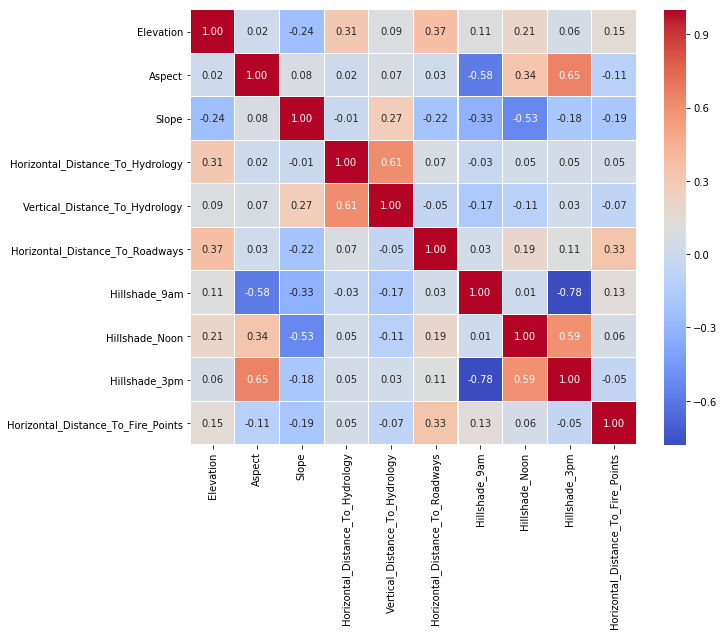

In [0]:
plt.figure(figsize=(10, 8))
sns.heatmap(raw_data[num_cols].corr(), annot = True, cmap='coolwarm', linewidths=.1, fmt='1.2f')

In [0]:
def plot_feature(feature, target, data):
    plt.figure(figsize=(15, 5))
    sns.set(style="darkgrid")
    plt.suptitle((feature.title() + ' vs. ' + target.title()))
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[feature], bins = 9)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x = target, y = feature, data = data)

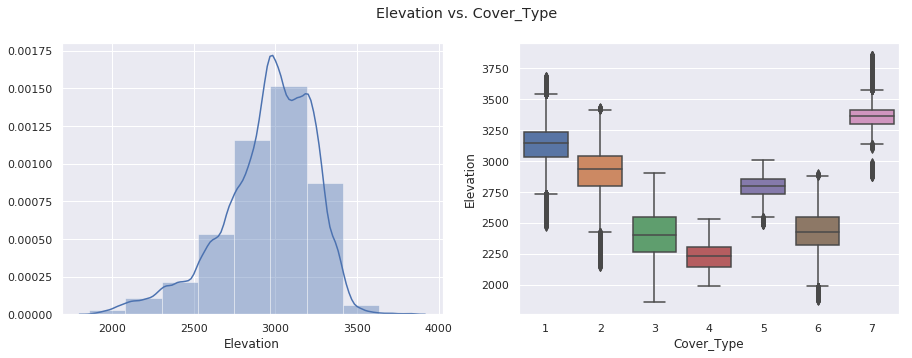

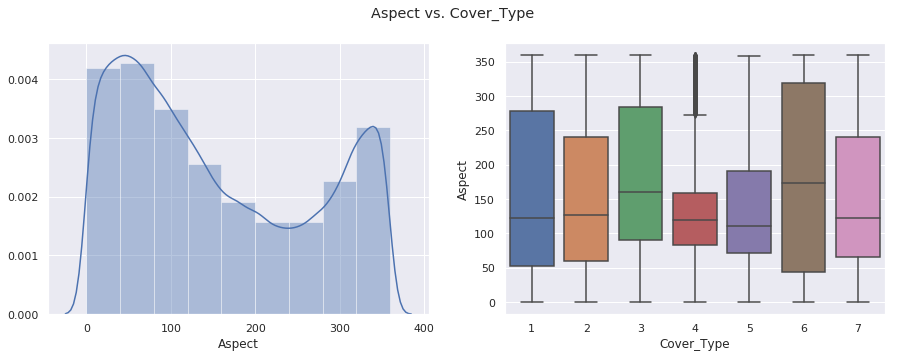

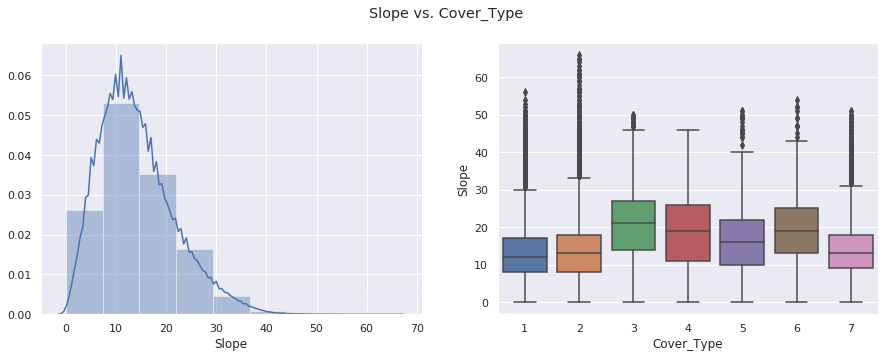

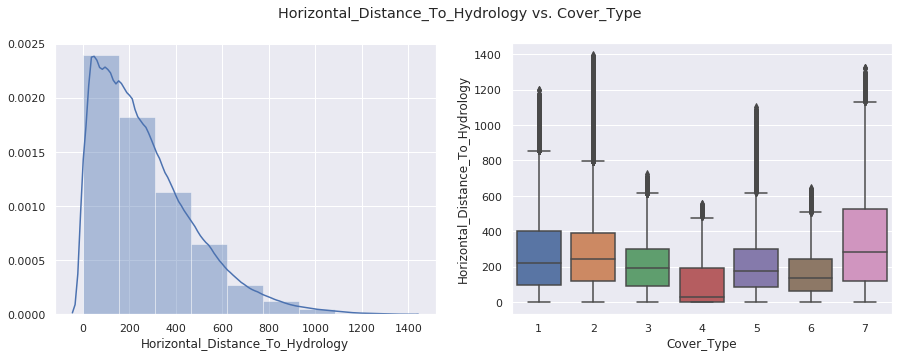

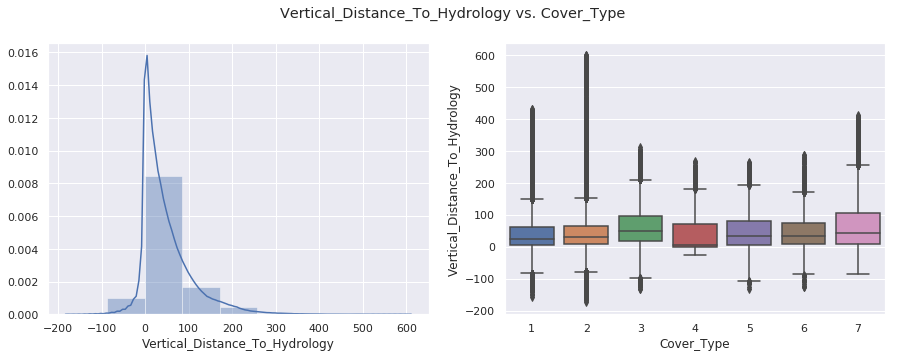

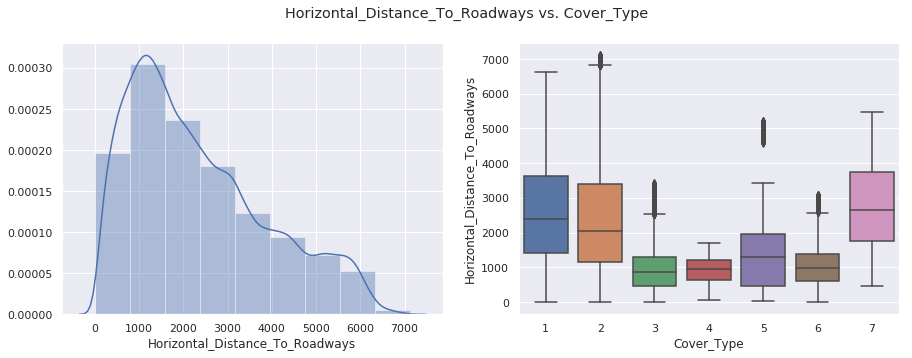

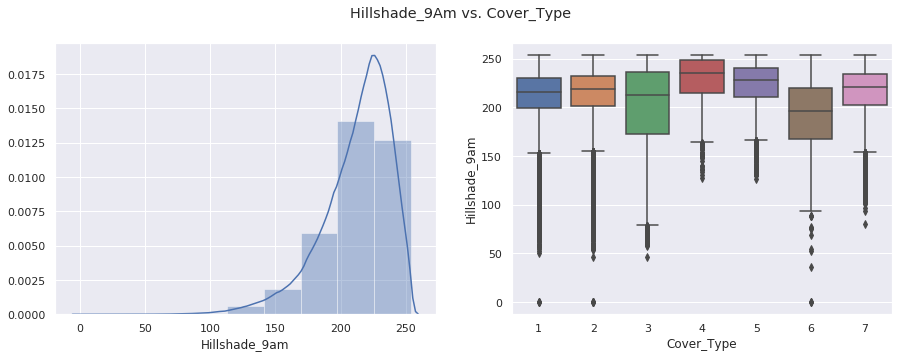

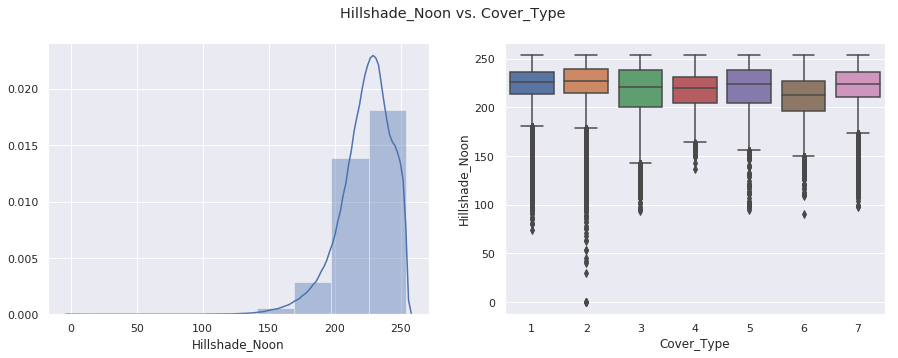

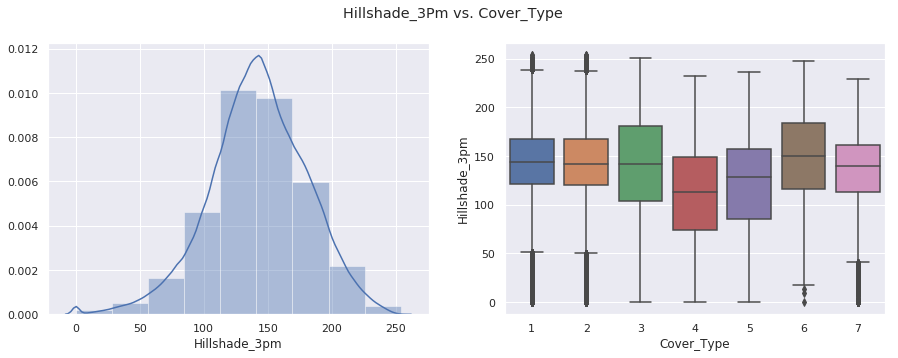

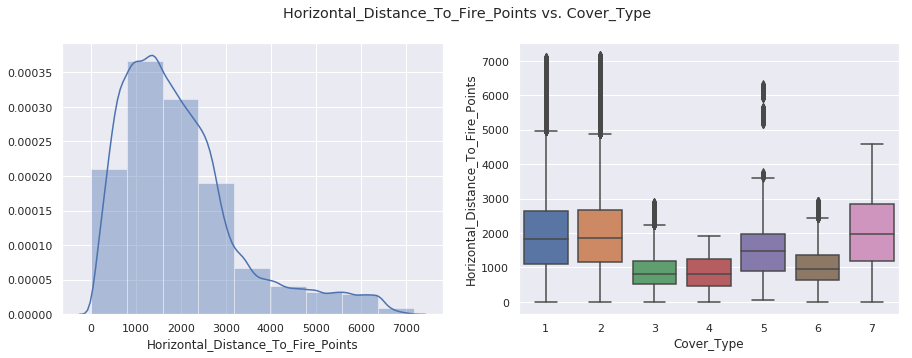

In [0]:
for item in num_cols:
    plot_feature(item, target_col[0], raw_data[num_cols + target_col])

**Key Insights**

Looks like features such as *Elevation*, *Slope* and *Horizontal distance to roadways* does a good job at predicting *Cover type*.
Other features do not manifest clear correlation with dependable variable.

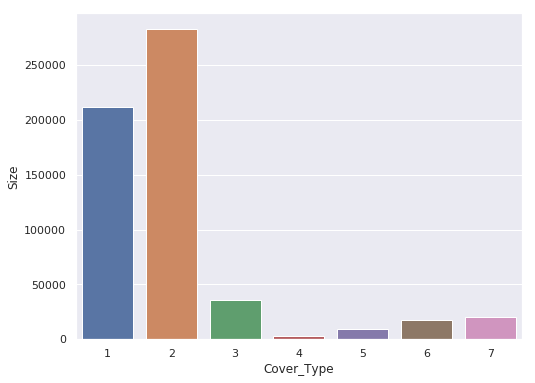

In [0]:
class_dist = raw_data.groupby(target_col[0]).size()
class_label = pd.DataFrame(class_dist, columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index, y='Size', data=class_label)

In [0]:
for i, number in enumerate(class_dist):
    percent = (number / class_dist.sum()) * 100
    print('Cover_Type', class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type 1
36.46 %
Cover_Type 2
48.76 %
Cover_Type 3
6.15 %
Cover_Type 4
0.47 %
Cover_Type 5
1.63 %
Cover_Type 6
2.99 %
Cover_Type 7
3.53 %


**Key Insights**

Cover_Type 1 and 2 i.e **Spruce/Fir** and **Lodgepole Pine** seems to dominate the area. And the Cover_Type 4 i.e **Cottonwood/Willow** is very rare comparing to the rest.

## ***Data Split - Train / Validation / Test***

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
work_data = raw_data.copy()

In [0]:
def data_split(data, labels, size):
    # Data split part
    train_data, valtest_data, train_labels, valtest_labels = train_test_split(
        data, labels, test_size=size, random_state=10
    )
    test_data, val_data, test_labels, val_labels = train_test_split(
        valtest_data, valtest_labels, test_size=0.5, random_state=11
    )
    
    # Data saving
    train_data.to_csv(path_or_buf=TEMP_DIR + '/' + 'train_data.csv', index=False, header=True)
    val_data.to_csv(path_or_buf=TEMP_DIR + '/' + 'val_data.csv', index=False, header=True)
    test_data.to_csv(path_or_buf=TEMP_DIR + '/' + 'test_data.csv', index=False, header=True)
    train_labels.to_csv(path_or_buf=TEMP_DIR + '/' + 'train_labels.csv', index=False, header=True)
    val_labels.to_csv(path_or_buf=TEMP_DIR + '/' + 'val_labels.csv', index=False, header=True)
    test_labels.to_csv(path_or_buf=TEMP_DIR + '/' + 'test_labels.csv', index=False, header=True)
    
    return train_data, test_data, val_data, train_labels, test_labels, val_labels

In [0]:
train_data, test_data, val_data, train_labels, test_labels, val_labels = data_split(
    work_data[num_cols + enc1_cols + enc2_cols], work_data[target_col[0]], 0.4
)

In [0]:
[x.shape for x in (train_data, val_data, test_data, train_labels, val_labels, test_labels)]

[(348607, 54), (116203, 54), (116202, 54), (348607,), (116203,), (116202,)]

## ***Data Preprocessing***

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
data = train_data.copy()
labels = train_labels.copy()

In [0]:
[x.shape for x in (data, labels)]

[(348607, 54), (348607,)]

**Scaling numeric features**

In [0]:
def nums_fit_transform(df, num_cols):
    df = df.copy()
    num_features_map = {}
    df[num_cols] = df[num_cols].astype(float)
    for num_col in num_cols:
        num_features_map[num_col] = {
            "mean": df[num_col].mean(),
            "std": df[num_col].std()
        }
        df[num_col] = (
            df[num_col] - num_features_map[num_col]["mean"]
        ) / num_features_map[num_col]["std"]
    return df, num_features_map

In [0]:
def nums_transform(df, num_features_map):
    df = df.copy()
    for num_col in num_features_map:
        df[num_col] = (
            df[num_col] - num_features_map[num_col]["mean"]
        ) / num_features_map[num_col]["std"]
    return df

In [0]:
data, num_features_map = nums_fit_transform(data, num_cols)

In [0]:
import pickle

In [0]:
with open(TEMP_DIR + '/' + 'num_features_map.pkl', 'wb') as f:
    pickle.dump(num_features_map, f, pickle.HIGHEST_PROTOCOL)

## ***Building ML & NN models***

In [0]:
# Models to be trained
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics to evaluate models
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix
import joblib

In [0]:
# Preparing to capture models & metrics
model_metrics = pd.DataFrame(columns=['Precision', 'Accuracy', 'F1 score'])
model_list = [
    RandomForestClassifier(n_estimators=100, n_jobs=-1),
    LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=15000),
    DecisionTreeClassifier(),
    LinearSVC(max_iter=15000),
    KNeighborsClassifier(n_jobs=-1, n_neighbors=7, weights='distance'),
    GaussianNB()
]
model_index = []

In [0]:
# Training ML models
def ml_model_train(model, data, labels):
    model_name = type(model).__name__
    
    # Fitting train data
    model.fit(data, labels)
    
    # Saving model
    joblib.dump(model, TEMP_DIR + '/' + model_name + '.pkl')

In [0]:
for model in model_list:
    ml_model_train(model, data, labels)
    model_index.append(type(model).__name__)

In [0]:
# Evaluating ML models
def ml_model_predict(model_name, data, labels):
    # Reloading model
    model = joblib.load(TEMP_DIR + '/' + model_name + '.pkl')
    
    # Predicting on validation data
    preds = model.predict(data)
    
    # Evaluating model
    print(model_name, 'Confusion Matrix:')
    print(confusion_matrix(labels, preds))
    
    print(model_name, 'Classification Report:')    
    print(classification_report(labels, preds))
    
    model_prec = precision_score(labels, preds, average='weighted')
    print('Using',  model_name, 'we get a precision score of:', str(round(model_prec * 100, 2))+'%')
    
    model_accu = accuracy_score(labels, preds)
    print('Using',  model_name, 'we get an accuracy score of:', str(round(model_accu * 100, 2))+'%')
    
    model_f1 = f1_score(labels, preds, average='weighted')
    print('Using',  model_name, 'we get a f1 score of:', str(round(model_accu * 100, 2))+'%')
    
    return model_prec, model_accu, model_f1

In [0]:
# Assigning validation dataset
data = val_data.copy()
labels = val_labels.copy()

# Scaling validation dataset
data = nums_transform(data, num_features_map)

In [0]:
for model_name in model_index:
    model_prec, model_accu, model_f1 = ml_model_predict(model_name, data, labels)
    model_metrics.loc[model_name, 'Precision'] = model_prec
    model_metrics.loc[model_name, 'Accuracy'] = model_accu
    model_metrics.loc[model_name, 'F1 score'] = model_f1

RandomForestClassifier Confusion Matrix:
[[39754  2549     2     0     7     7    95]
 [ 1346 54996   118     2    85    87    10]
 [    1   126  6869    26    11   165     0]
 [    0     0    55   444     0    11     0]
 [   38   446    22     0  1408     6     0]
 [    5   127   301    11     1  3082     0]
 [  249    18     0     0     0     0  3723]]
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42414
           2       0.94      0.97      0.96     56644
           3       0.93      0.95      0.94      7198
           4       0.92      0.87      0.89       510
           5       0.93      0.73      0.82      1920
           6       0.92      0.87      0.90      3527
           7       0.97      0.93      0.95      3990

    accuracy                           0.95    116203
   macro avg       0.94      0.90      0.92    116203
weighted avg       0.95      0.95      0.95    116203



**Comparing ML models**

In [0]:
model_metrics

,Precision,Accuracy,F1 score
RandomForestClassifier,0.949107,0.948994,0.948671
LogisticRegression,0.713538,0.724603,0.714996
DecisionTreeClassifier,0.930785,0.930828,0.930801
LinearSVC,0.703639,0.713364,0.69742
KNeighborsClassifier,0.92372,0.923857,0.923712
GaussianNB,0.501766,0.0907894,0.0582178
